In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error

# Challenge 1 - clean the data

Import the data in ../data/economies_of_scale.csv into a pandas dataframe

In [17]:
#your code here

profit = pd.read_csv('D:\ironhack\Coursework\week_10\labs\lab-bias-variance-tradeoff\data\economies_of_scale.csv')


<>:3: SyntaxWarning: invalid escape sequence '\i'
<>:3: SyntaxWarning: invalid escape sequence '\i'
C:\Users\edumc\AppData\Local\Temp\ipykernel_54400\1158662107.py:3: SyntaxWarning: invalid escape sequence '\i'
  profit = pd.read_csv('D:\ironhack\Coursework\week_10\labs\lab-bias-variance-tradeoff\data\economies_of_scale.csv')


In [18]:
profit.shape

(95, 2)

In [8]:
profit.head()

,items_produced,total_profit
0,899,111K$
1,2051,5953K$
2,1613,822K$
3,1347,-1269K$
4,462,313K$


In [9]:
profit.dtypes

items_produced     int64
total_profit      object
dtype: object

In [10]:
profit.isnull().sum()

items_produced    0
total_profit      0
dtype: int64

In [11]:
profit.describe()

,items_produced
count,95.000000
mean,1064.052632
std,581.163586
min,161.000000
25%,517.500000
50%,1062.000000
75%,1592.000000
max,2081.000000


Notice the column *total_profit* is in text. You first need to clean this data to turn it back into numeric data. You can consider using the method *apply* or *replace* to do this

In [19]:
# clean the column total_profit to make it numeric

profit['total_profit'] = profit['total_profit'].str.replace('K$', '').str.replace('$', '').astype(float) * 1000
profit['total_profit'].head()

0     111000.0
1    5953000.0
2     822000.0
3   -1269000.0
4     313000.0
Name: total_profit, dtype: float64

Now let's visualize how total profitability changes with number of machines sold 

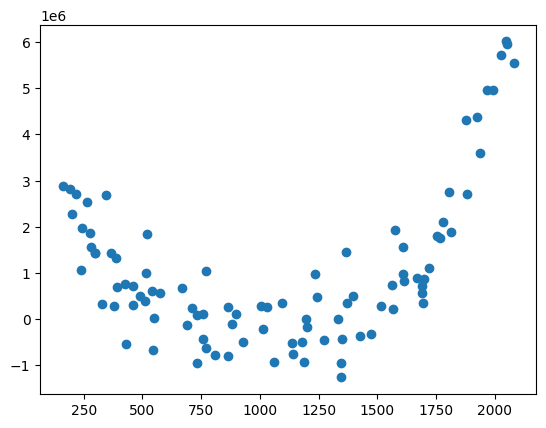

In [20]:
plt.scatter(profit['items_produced'], profit['total_profit'], label="Data")
plt.show()

This is an expected phenomenon called [*economies of scale*](https://en.wikipedia.org/wiki/Economies_of_scale): If you sell a very niche product (few sales) you can usuallyy charge a premium and have good profitability, since there will likely not be sufficient market for many competitors. As your product becomes more mainstream and more players enter the market, the supply pressures lower your profitability. Finally, once you break through to become a large player, as you expand your operations, your fixed costs become more and more diluted by the total number of items sold and your profitability increases again due to your lower operating costs.

In this exercise we are going to try to predict the profitability of the company based on the number of items sold.
Select your Features (X) and your Targets (y) and perform a test-train split.

In [24]:
from sklearn.model_selection import train_test_split
# Complete the feature selection and train-test split
X = profit[['items_produced']]  # Features
y = profit['total_profit']      # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data shape:", profit.shape)
print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])
print("\nFirst few rows of cleaned data:")
print(profit.head())

Data shape: (95, 2)
Training set size: 76
Test set size: 19

First few rows of cleaned data:
   items_produced  total_profit
0             899      111000.0
1            2051     5953000.0
2            1613      822000.0
3            1347    -1269000.0
4             462      313000.0


# Degree 1

Let's first approach this problem with a simple linear regression

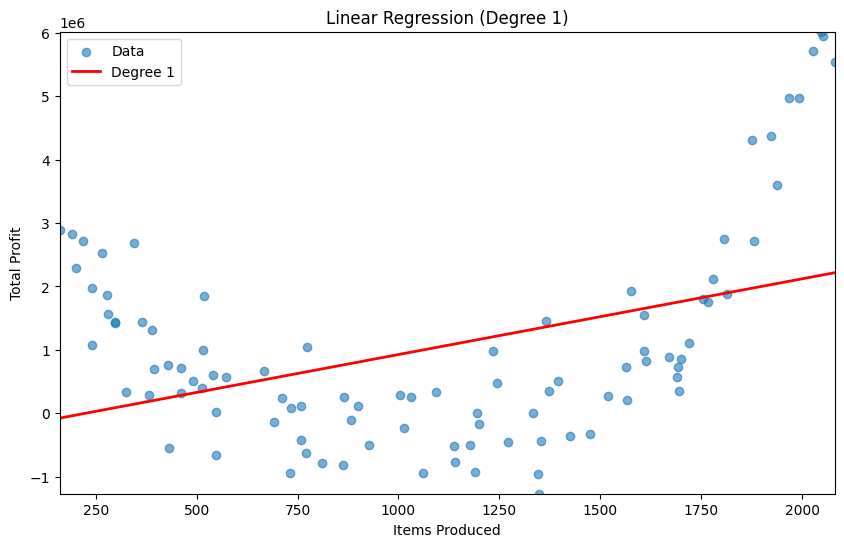

Degree 1 - Train Error: 2.41e+12, Test Error: 2.29e+12


In [25]:
# Degree 1 - Linear Regression (Fixed)

scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_scaled_train, y_train)

y_train_pred = model.predict(X_scaled_train)
y_test_pred = model.predict(X_scaled_test)
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label="Data", alpha=0.6)
X_plot = pd.DataFrame(np.linspace(X['items_produced'].min(), X['items_produced'].max(), 100).reshape(-1, 1), 
                     columns=['items_produced'])
y_plot = model.predict(scaler.transform(X_plot))
plt.plot(X_plot, y_plot, label="Degree 1", linewidth=2, color='red')
plt.xlim(X['items_produced'].min(), X['items_produced'].max())
plt.ylim(y.min(), y.max())
plt.xlabel('Items Produced')
plt.ylabel('Total Profit')
plt.legend()
plt.title('Linear Regression (Degree 1)')
plt.show()

print(f"Degree 1 - Train Error: {train_error:.2e}, Test Error: {test_error:.2e}")

We can easily see this is not a good model. It completely misses the niche side of the market and it does not approximate well  the profitability of the large players. This is a weak model with little generalization power.
This model exhibits *high bias*: the data DOES NOT fit well with the training data. It is however a nodel with *low variance*: the profit predicted  swings in expected ways with the sold units.
This is typical in cases of *Underfitting*.

# Degree 2

We are going to introdduce a common regression technique called *polynomial regression*. When you have a single feature $X$ and you apply a linear regression you are finding the optimal coefficientf for the formula

$$ y = \beta_0 + \beta_1 X $$

We are going to create new features by considering powers of the base feature $X$, so a *quadratic* regression would produce the optimal coefficients for the formula

$$y = \beta_0 + \beta_1 X + \beta_2 X^2$$

and a *cubic* regression would produce the optimal coefficients for the formula

$$y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3$$

and so on.

This way, with a single feature *X* you can produce multiple features $X^2$, $X^3$, etc to apply a higher dimensional Linear Regression. We create these extra features $X^2$, $X^3$ using a sklearn preprocessing tool called *PolynomialFeatures*

In [26]:
#polynomial features of degree 1 gives us a constant term plus the linear term 
from sklearn.preprocessing import PolynomialFeatures

X_example = [[1],[2],[3],[5]]
poly_features = PolynomialFeatures(degree=1)
poly_features.fit_transform(X_example)

array([[1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 5.]])

In [27]:
#polynomial features of degree 2 gives us a constant term plus the linear term, plus a quadratic term 
X_example = [[1],[2],[3],[5]]
poly_features = PolynomialFeatures(degree=2)
poly_features.fit_transform(X_example)

array([[ 1.,  1.,  1.],
       [ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  5., 25.]])

In [28]:
#polynomial features of degree 2 gives us a constant term plus the linear term, plus a cubic term 
X_example = [[1],[2],[3],[5]]
poly_features = PolynomialFeatures(degree=3)
poly_features.fit_transform(X_example)

array([[  1.,   1.,   1.,   1.],
       [  1.,   2.,   4.,   8.],
       [  1.,   3.,   9.,  27.],
       [  1.,   5.,  25., 125.]])

And so on. So, if we want to use a quadratic approximation to this problem we run the following code

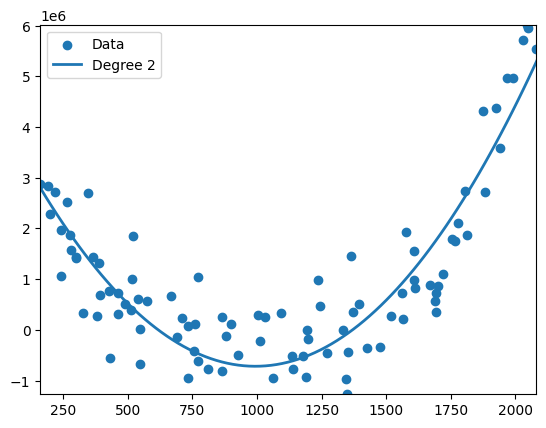

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

scaler = StandardScaler()
poly_features = PolynomialFeatures(degree=2)  # here is where the 2 comes in
X_poly_train = scaler.fit_transform(poly_features.fit_transform(X_train))
X_poly_test = scaler.transform(poly_features.transform(X_test))

model = LinearRegression()
model.fit(X_poly_train, y_train)

y_train_pred = model.predict(X_poly_train)
y_test_pred = model.predict(X_poly_test)
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)

plt.scatter(X, y, label="Data")
X_plot = pd.DataFrame(np.linspace(100, 2200, 100).reshape(-1, 1), columns=['items_produced'])
y_plot = model.predict(scaler.transform(poly_features.transform(X_plot)))
plt.plot(X_plot, y_plot, label="Degree 2", linewidth=2)
plt.xlim(X['items_produced'].min(), X['items_produced'].max())
plt.ylim(y.min(), y.max())
plt.legend()
plt.show()

You can see the fit obviously looks much better just by visual inspection. Let's keep it going...

# Challenge 2 -Degree 4

Replicate the exercise above but now for degree 4. Is the fit improving?

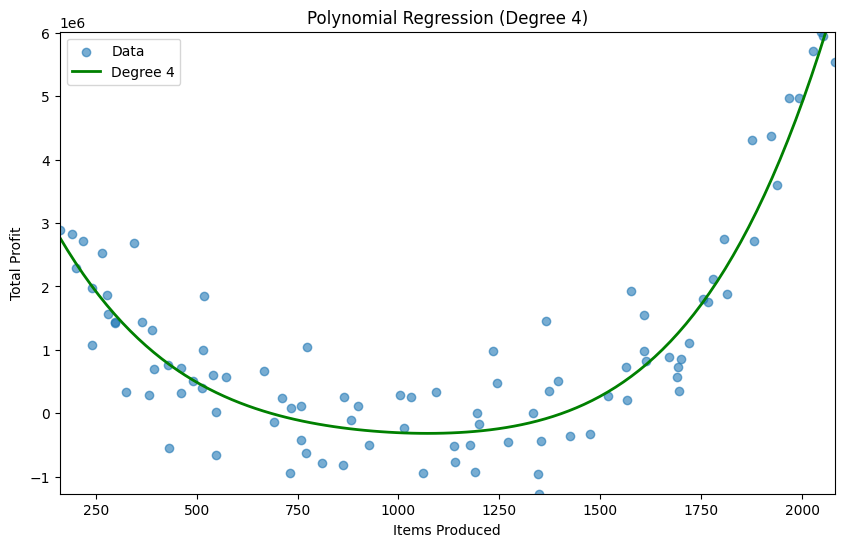

Degree 4 - Train Error: 3.82e+11, Test Error: 2.81e+11


In [32]:
#your code here
scaler = StandardScaler()
poly_features = PolynomialFeatures(degree=4)  # Degree 4 polynomial

# Transform the training data
X_poly_train = scaler.fit_transform(poly_features.fit_transform(X_train))
X_poly_test = scaler.transform(poly_features.transform(X_test))

# Fit the model
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Make predictions
y_train_pred = model.predict(X_poly_train)
y_test_pred = model.predict(X_poly_test)
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label="Data", alpha=0.6)
X_plot = pd.DataFrame(np.linspace(X['items_produced'].min(), X['items_produced'].max(), 100).reshape(-1, 1), 
                     columns=['items_produced'])
y_plot = model.predict(scaler.transform(poly_features.transform(X_plot)))
plt.plot(X_plot, y_plot, label="Degree 4", linewidth=2, color='green')
plt.xlim(X['items_produced'].min(), X['items_produced'].max())
plt.ylim(y.min(), y.max())
plt.xlabel('Items Produced')
plt.ylabel('Total Profit')
plt.legend()
plt.title('Polynomial Regression (Degree 4)')
plt.show()

print(f"Degree 4 - Train Error: {train_error:.2e}, Test Error: {test_error:.2e}")

It seems like we keep increasing the fit. The model has more variance, but it also loses more bias in a way that seems like a good tradeoff!

# Challenge 3 -High degrees

so... should we keep this going forever?
Replicate the exercise above but now for degrees 12, 16, 20.... Is the fit improving? Why?

(Bonus question for you to consider: why am I only asking for even degrees?)

Degree 12 - Train Error: 3.62e+11, Test Error: 2.78e+11
Degree 16 - Train Error: 3.44e+11, Test Error: 2.79e+11
Degree 20 - Train Error: 3.35e+11, Test Error: 2.87e+11


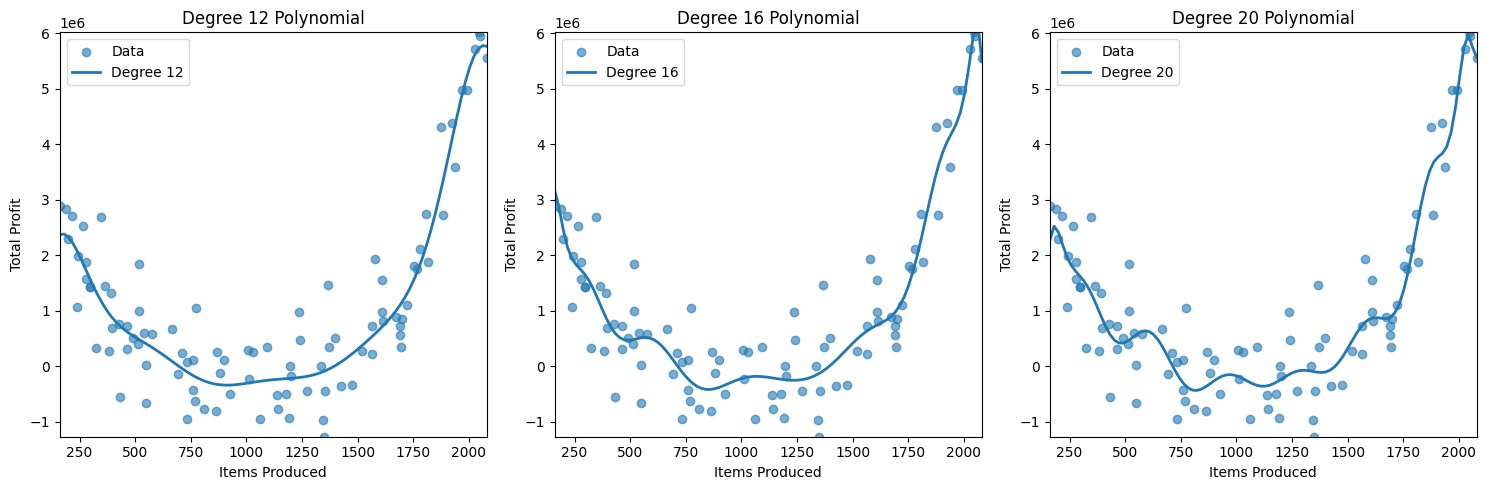


Answer to bonus question: We use even degrees because odd-degree polynomials
can have asymptotic behavior (going to +∞ or -∞ at the extremes) which
might create unrealistic predictions outside our data range.


In [33]:
#your code here
# Challenge 3 - High Degree Polynomials (12, 16, 20)

def fit_polynomial_degree(degree, X_train, X_test, y_train, y_test):
    """Fit polynomial regression of given degree and return errors"""
    scaler = StandardScaler()
    poly_features = PolynomialFeatures(degree=degree)
    
    # Transform the data
    X_poly_train = scaler.fit_transform(poly_features.fit_transform(X_train))
    X_poly_test = scaler.transform(poly_features.transform(X_test))
    
    # Fit the model
    model = LinearRegression()
    model.fit(X_poly_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_poly_train)
    y_test_pred = model.predict(X_poly_test)
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    
    return model, scaler, poly_features, train_error, test_error

# Test high degrees
high_degrees = [12, 16, 20]
plt.figure(figsize=(15, 5))

for i, degree in enumerate(high_degrees, 1):
    model, scaler, poly_features, train_error, test_error = fit_polynomial_degree(
        degree, X_train, X_test, y_train, y_test)
    
    # Plot
    plt.subplot(1, 3, i)
    plt.scatter(X, y, label="Data", alpha=0.6)
    X_plot = pd.DataFrame(np.linspace(X['items_produced'].min(), X['items_produced'].max(), 100).reshape(-1, 1), 
                         columns=['items_produced'])
    y_plot = model.predict(scaler.transform(poly_features.transform(X_plot)))
    plt.plot(X_plot, y_plot, label=f"Degree {degree}", linewidth=2)
    plt.xlim(X['items_produced'].min(), X['items_produced'].max())
    plt.ylim(y.min(), y.max())
    plt.xlabel('Items Produced')
    plt.ylabel('Total Profit')
    plt.legend()
    plt.title(f'Degree {degree} Polynomial')
    
    print(f"Degree {degree} - Train Error: {train_error:.2e}, Test Error: {test_error:.2e}")

plt.tight_layout()
plt.show()

print("\nAnswer to bonus question: We use even degrees because odd-degree polynomials")
print("can have asymptotic behavior (going to +∞ or -∞ at the extremes) which")
print("might create unrealistic predictions outside our data range.")



It looks like the more powerufl models are starting to behave in erratic ways, trying to fit too closely to the training data.
They are getting *lower bias*: the data DOES fit better with the training data...
... but the cost of that is *higher variance*: the models becomes swingy and it seems that it's not reflecting real patterns in the data.

# Challenge 4 -Visualizing errors 

Let's see what happens to the errors.
Run the code above in a loop and collect the *train_error* and *test_error* for each degree. Then plot them all.

In [35]:
degrees = [1, 2, 4, 12, 16, 20]
train_errors = []
test_errors = []

for degree in degrees:
    # your code here
    degrees = [1, 2, 4, 8, 12, 16, 20]
    train_errors = []
    test_errors = []

for degree in degrees:
    print(f"Processing degree {degree}...")
    
    scaler = StandardScaler()
    poly_features = PolynomialFeatures(degree=degree)
    
    # Transform the data
    X_poly_train = scaler.fit_transform(poly_features.fit_transform(X_train))
    X_poly_test = scaler.transform(poly_features.transform(X_test))
    
    # Fit the model
    model = LinearRegression()
    model.fit(X_poly_train, y_train)
    
    # Make predictions and calculate errors
    y_train_pred = model.predict(X_poly_train)
    y_test_pred = model.predict(X_poly_test)
    
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    
    train_errors.append(train_error)
    test_errors.append(test_error)
    
    print(f"  Train Error: {train_error:.2e}, Test Error: {test_error:.2e}")

    

Processing degree 1...
  Train Error: 2.41e+12, Test Error: 2.29e+12
Processing degree 2...
  Train Error: 5.08e+11, Test Error: 4.25e+11
Processing degree 4...
  Train Error: 3.82e+11, Test Error: 2.81e+11
Processing degree 8...
  Train Error: 3.65e+11, Test Error: 2.71e+11
Processing degree 12...
  Train Error: 3.62e+11, Test Error: 2.78e+11
Processing degree 16...
  Train Error: 3.44e+11, Test Error: 2.79e+11
Processing degree 20...
  Train Error: 3.35e+11, Test Error: 2.87e+11


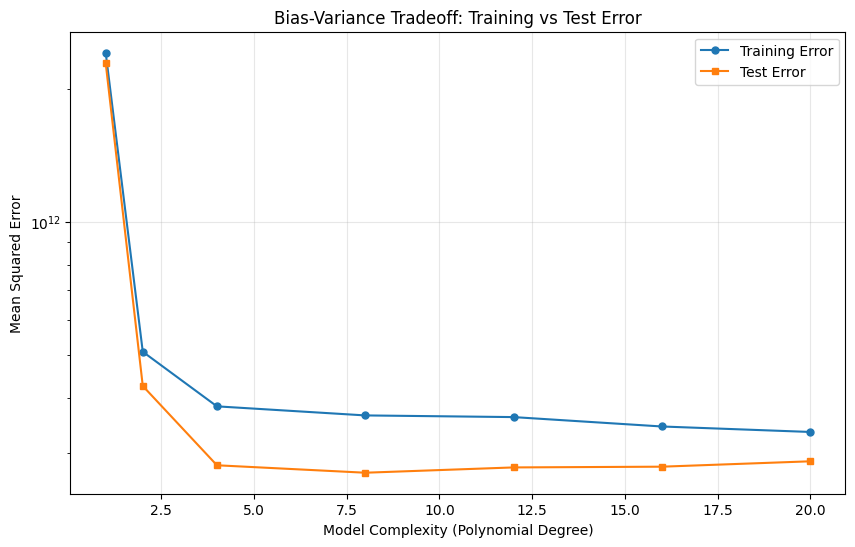

In [42]:
# Plot the bias-variance tradeoff
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, 'o-', label="Training Error", linewidth=1.5, markersize=5)
plt.plot(degrees, test_errors, 's-', label="Test Error", linewidth=1.5, markersize=5)
plt.xlabel("Model Complexity (Polynomial Degree)")
plt.ylabel("Mean Squared Error")
plt.title("Bias-Variance Tradeoff: Training vs Test Error")
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')  # Use log scale for better visualization
plt.show()

You see that the training error keeps going down. That is expected: higher order models are more powerful but they start having enough power to fit the noise in the training data. Because of this you see the testing error going up at some point: your model believes natural variation in the training data is part of the fundamental mechanist you are trying to learn and will not be able to generalize. It becomes *overfit*.

In [43]:
# Find the optimal degree (minimum test error)
optimal_degree = degrees[np.argmin(test_errors)]
print(f"\nOptimal polynomial degree (minimum test error): {optimal_degree}")
print(f"Test error at optimal degree: {min(test_errors):.2e}")

print("\nObservations:")
print("- Training error consistently decreases as model complexity increases")
print("- Test error initially decreases but then increases due to overfitting")
print("- The gap between training and test error grows with model complexity")
print("- This demonstrates the classic bias-variance tradeoff!")


Optimal polynomial degree (minimum test error): 8
Test error at optimal degree: 2.71e+11

Observations:
- Training error consistently decreases as model complexity increases
- Test error initially decreases but then increases due to overfitting
- The gap between training and test error grows with model complexity
- This demonstrates the classic bias-variance tradeoff!


# Optional Challenge - Regularization

Regularization is a way of controlling overfitting by imposing a price on the variance of the model. 
Re-run the high dimentionality *degree 20* case above but run a Lasso regression rather than a LinearRegression, with a significant penalty for runaway coefficients.

Hint: where you have 
`model = LinearRegression()`
use instead
`model = Lasso(alpha=100)`

In [47]:
from sklearn.linear_model import Lasso

#your code here
#let's see the effect of Lasso on degree 20
degree = 20
alpha = 100  # Regularization strength

scaler = StandardScaler()
poly_features = PolynomialFeatures(degree=degree)

# Transform the data
X_poly_train = scaler.fit_transform(poly_features.fit_transform(X_train))
X_poly_test = scaler.transform(poly_features.transform(X_test))

# Fit Lasso model
model_lasso = Lasso(alpha=alpha)
model_lasso.fit(X_poly_train, y_train)

# Compare with regular LinearRegression
model_linear = LinearRegression()
model_linear.fit(X_poly_train, y_train)

# Plot comparison
plt.figure(figsize=(15, 5))



d:\ironhack\Coursework\week_10\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.280e+13, tolerance: 2.199e+10
  model = cd_fast.enet_coordinate_descent(


<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

Text(0.5, 1.0, 'Linear Regression (Degree 20)')

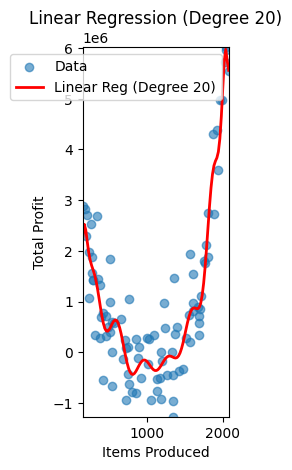

In [48]:
# Plot 1: Linear Regression (Degree 20)
plt.subplot(1, 3, 1)
plt.scatter(X, y, label="Data", alpha=0.6)
X_plot = pd.DataFrame(np.linspace(X['items_produced'].min(), X['items_produced'].max(), 100).reshape(-1, 1), 
                     columns=['items_produced'])
y_plot_linear = model_linear.predict(scaler.transform(poly_features.transform(X_plot)))
plt.plot(X_plot, y_plot_linear, label="Linear Reg (Degree 20)", linewidth=2, color='red')
plt.xlim(X['items_produced'].min(), X['items_produced'].max())
plt.ylim(y.min(), y.max())
plt.xlabel('Items Produced')
plt.ylabel('Total Profit')
plt.legend()
plt.title('Linear Regression (Degree 20)')

Text(0.5, 1.0, 'Lasso Regression (Degree 20, α=100)')

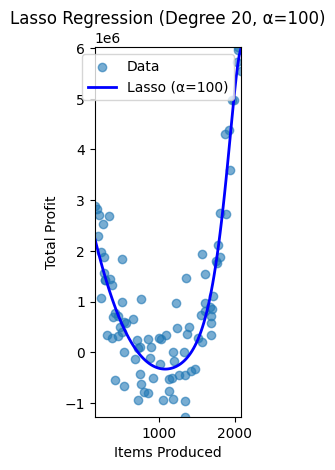

In [49]:
# Plot 2: Lasso Regression (Degree 20)
plt.subplot(1, 3, 2)
plt.scatter(X, y, label="Data", alpha=0.6)
y_plot_lasso = model_lasso.predict(scaler.transform(poly_features.transform(X_plot)))
plt.plot(X_plot, y_plot_lasso, label=f"Lasso (α={alpha})", linewidth=2, color='blue')
plt.xlim(X['items_produced'].min(), X['items_produced'].max())
plt.ylim(y.min(), y.max())
plt.xlabel('Items Produced')
plt.ylabel('Total Profit')
plt.legend()
plt.title(f'Lasso Regression (Degree 20, α={alpha})')

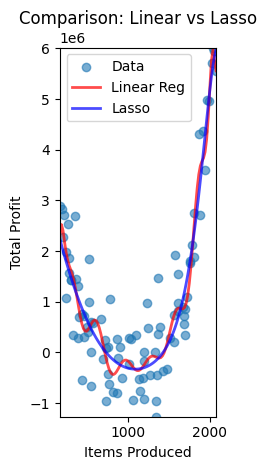

In [50]:
# Plot 3: Both together
plt.subplot(1, 3, 3)
plt.scatter(X, y, label="Data", alpha=0.6)
plt.plot(X_plot, y_plot_linear, label="Linear Reg", linewidth=2, color='red', alpha=0.7)
plt.plot(X_plot, y_plot_lasso, label="Lasso", linewidth=2, color='blue', alpha=0.7)
plt.xlim(X['items_produced'].min(), X['items_produced'].max())
plt.ylim(y.min(), y.max())
plt.xlabel('Items Produced')
plt.ylabel('Total Profit')
plt.legend()
plt.title('Comparison: Linear vs Lasso')

plt.tight_layout()
plt.show()

And now redo the test_error vs train_error plotting above, but using a Lasso regession rather than a linear regression.

What happens to the bias-variance tradeoff in this case?

In [ ]:
# Calculate errors
y_train_pred_linear = model_linear.predict(X_poly_train)
y_test_pred_linear = model_linear.predict(X_poly_test)
y_train_pred_lasso = model_lasso.predict(X_poly_train)
y_test_pred_lasso = model_lasso.predict(X_poly_test)

print("Degree 20 Comparison:")
print(f"Linear Regression - Train Error: {mean_squared_error(y_train, y_train_pred_linear):.2e}, Test Error: {mean_squared_error(y_test, y_test_pred_linear):.2e}")
print(f"Lasso Regression  - Train Error: {mean_squared_error(y_train, y_train_pred_lasso):.2e}, Test Error: {mean_squared_error(y_test, y_test_pred_lasso):.2e}")

Degree 20 Comparison:
Linear Regression - Train Error: 3.35e+11, Test Error: 2.87e+11
Lasso Regression  - Train Error: 3.76e+11, Test Error: 3.19e+11



Generating bias-variance plot with Lasso regularization...


d:\ironhack\Coursework\week_10\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.108e+13, tolerance: 2.199e+10
  model = cd_fast.enet_coordinate_descent(
d:\ironhack\Coursework\week_10\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.257e+13, tolerance: 2.199e+10
  model = cd_fast.enet_coordinate_descent(
d:\ironhack\Coursework\week_10\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisati

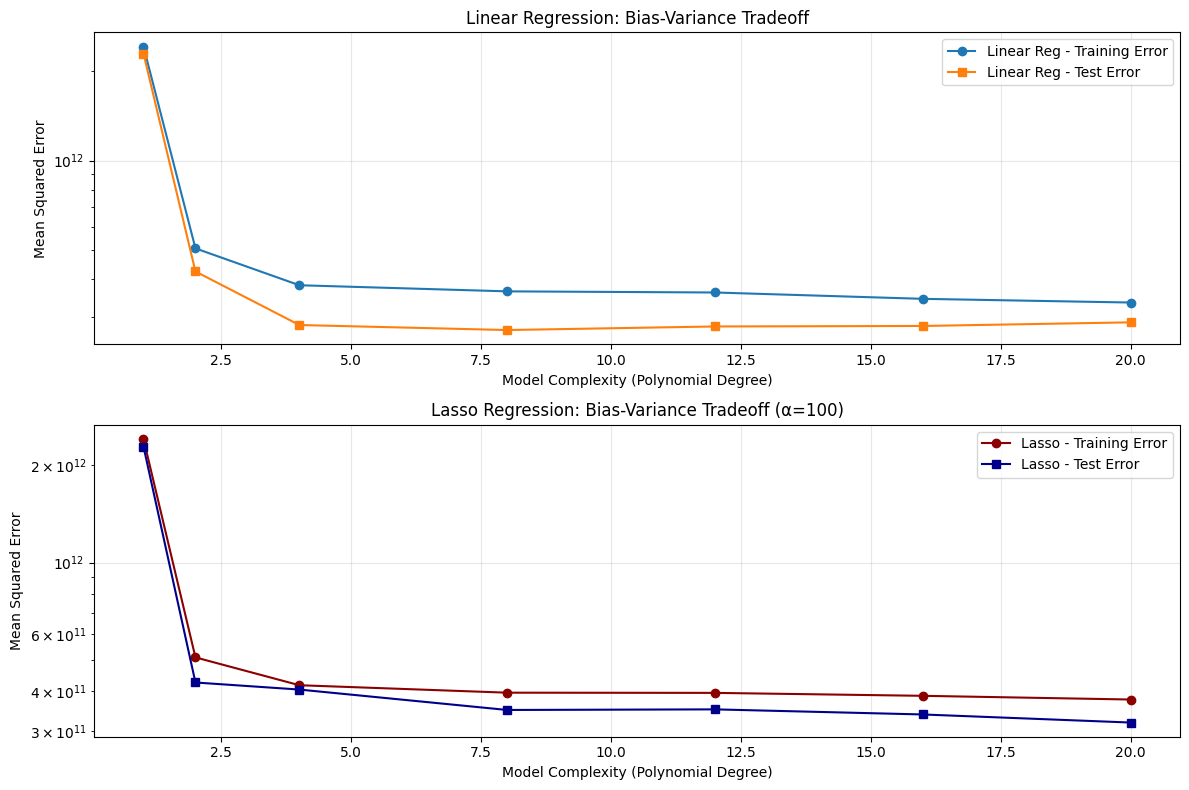


Regularization Analysis:
- Lasso regression adds a penalty for large coefficients
- This increases bias slightly but significantly reduces variance
- The test error is more stable across different polynomial degrees
- Regularization helps prevent overfitting in high-degree polynomials
- The gap between training and test error is much smaller with Lasso


In [57]:
# The full comparison across degrees
print("\nGenerating bias-variance plot with Lasso regularization...")

degrees = [1, 2, 4, 8, 12, 16, 20]
train_errors_lasso = []
test_errors_lasso = []

for degree in degrees:
    scaler = StandardScaler()
    poly_features = PolynomialFeatures(degree=degree)
    
    # Transform the data
    X_poly_train = scaler.fit_transform(poly_features.fit_transform(X_train))
    X_poly_test = scaler.transform(poly_features.transform(X_test))
    
    # Fit Lasso model
    model = Lasso(alpha=100)
    model.fit(X_poly_train, y_train)
    
    # Make predictions and calculate errors
    y_train_pred = model.predict(X_poly_train)
    y_test_pred = model.predict(X_poly_test)
    
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    
    train_errors_lasso.append(train_error)
    test_errors_lasso.append(test_error)

# Plot comparison of Linear vs Lasso
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(degrees, train_errors, 'o-', label="Linear Reg - Training Error", linewidth=1.5, markersize=6)
plt.plot(degrees, test_errors, 's-', label="Linear Reg - Test Error", linewidth=1.5, markersize=6)
plt.xlabel("Model Complexity (Polynomial Degree)")
plt.ylabel("Mean Squared Error")
plt.title("Linear Regression: Bias-Variance Tradeoff")
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')

plt.subplot(2, 1, 2)
plt.plot(degrees, train_errors_lasso, 'o-', label="Lasso - Training Error", linewidth=1.5, markersize=6, color='darkred')
plt.plot(degrees, test_errors_lasso, 's-', label="Lasso - Test Error", linewidth=1.5, markersize=6, color='darkblue')
plt.xlabel("Model Complexity (Polynomial Degree)")
plt.ylabel("Mean Squared Error")
plt.title("Lasso Regression: Bias-Variance Tradeoff (α=100)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')

plt.tight_layout()
plt.show()

print("\nRegularization Analysis:")
print("- Lasso regression adds a penalty for large coefficients")
print("- This increases bias slightly but significantly reduces variance")
print("- The test error is more stable across different polynomial degrees")
print("- Regularization helps prevent overfitting in high-degree polynomials")
print("- The gap between training and test error is much smaller with Lasso")